# Look
Looking at the data of [Pokemon Image Dataset](https://www.kaggle.com/vishalsubbiah/pokemon-images-and-types/downloads/pokemon-images-and-types.zip/3)

In [9]:
import pandas as pd

In [10]:
# load data
pokemon_csv = pd.read_csv('../backup/pokemon.csv')
pokemon_csv.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [11]:
# info
pokemon_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 3 columns):
Name     809 non-null object
Type1    809 non-null object
Type2    405 non-null object
dtypes: object(3)
memory usage: 19.1+ KB


In [12]:
# There are 405 pokemons that does not have a second type...
# What should I do with this

In [13]:
# Search for duplication of names
pokemon_names = pokemon_csv['Name'].unique()
len(pokemon_names)

809

In [14]:
from PIL import Image, ImageOps
import numpy as np

In [15]:
# collecting sizes of all images
def image_size(pokemon_name):
    try:
        img=Image.open('../backup/images/'+pokemon_name+'.png')
    except:
        img=Image.open('../backup/images/'+pokemon_name+'.jpg')
    return [img.width, img.height]

In [16]:
index2size = []
for name in pokemon_names:
    index2size.append(image_size(name))
index2size = np.array(index2size)

In [17]:
print(index2size.mean(), index2size.min(), index2size.max())

120.0 120 120


In [18]:
# every picture is resized to 120x120
# good!

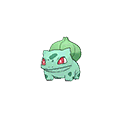

In [19]:
Image.open('../backup/images/'+pokemon_names[0]+'.png')

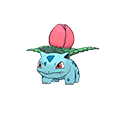

In [20]:
Image.open('../backup/images/'+pokemon_names[1]+'.png')

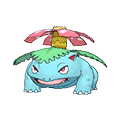

In [21]:
Image.open('../backup/images/'+pokemon_names[2]+'.png')

In [22]:
# I think the data inside the csv file is in order

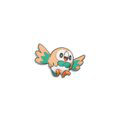

In [23]:
# flipping and flopping the image(jpg)
Image.open('../backup/images/'+'rowlet'+'.jpg')

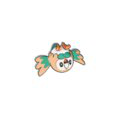

In [24]:
img = Image.open('../backup/images/'+'rowlet'+'.jpg')
ImageOps.flip(img)

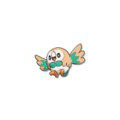

In [25]:
ImageOps.mirror(img)

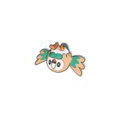

In [26]:
mr_img = ImageOps.mirror(img)
ImageOps.flip(mr_img)

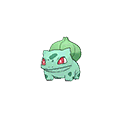

In [27]:
# flipping and flopping the image(png)
img = Image.open('../backup/images/'+pokemon_names[0]+'.png')
img

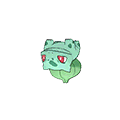

In [28]:
ImageOps.flip(img)

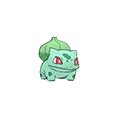

In [29]:
ImageOps.mirror(img)

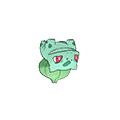

In [30]:
mr_img = ImageOps.mirror(img)
ImageOps.flip(mr_img)

In [31]:
# flip flopping the images are good!
# possible for using it in data augmentation

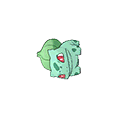

In [32]:
# How about rotation?
img.rotate(90)

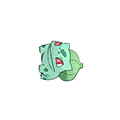

In [33]:
img.rotate(270)

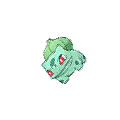

In [34]:
img.rotate(45)

In [35]:
# good!

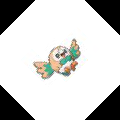

In [36]:
img = Image.open('../backup/images/'+'rowlet'+'.jpg')
rot = img.rotate(45)
rot

In [37]:
# oops...

In [38]:
# I think I have to remake all the '.png' files to '.jpg'
# Not the opposite way because the white pixels in '.png' files are all invisible pixels...

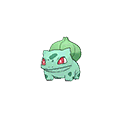

In [39]:
# let's try
# load png data
img = Image.open('../backup/images/'+pokemon_names[0]+'.png')
# make a new RGBA image, with a white background
new_img = Image.new('RGBA', img.size, (255, 255, 255))
# paste png image to the new image
new_img.paste(img, (0,0))
# convert to RGB
new_img.convert('RGB')
new_img

In [40]:
# yes! perfect.

In [41]:
# thats it for now...

In [ ]:
# ok. more...

In [52]:
m_poke = pd.melt(pokemon_csv, id_vars=['Name'], value_vars=['Type1', 'Type2'], value_name='Type')
m_poke = m_poke.drop(['variable'], axis=1)
m_poke

,Name,Type
0,bulbasaur,Grass
1,ivysaur,Grass
2,venusaur,Grass
3,charmander,Fire
4,charmeleon,Fire
...,...,...
1613,stakataka,Steel
1614,blacephalon,Ghost
1615,zeraora,NaN
1616,meltan,NaN


In [53]:
m_poke.dropna()

,Name,Type
0,bulbasaur,Grass
1,ivysaur,Grass
2,venusaur,Grass
3,charmander,Fire
4,charmeleon,Fire
...,...,...
1609,magearna,Fairy
1610,marshadow,Ghost
1612,naganadel,Dragon
1613,stakataka,Steel
